Steganography method: LSB

msg - split by space

splitted msg -> binary

binary - preprocess (ke str)

add - stopper at the end of each list

stopper at the last row

### Define string, string to byte, then preprocess

In [1]:
def byte_preprocess(x):
    x= str(x)[2:]
    # if len(x)<7:
    #     x+= '0'*(7-len(x))

    return x

In [2]:
STOPPER= '@'
BINARY_STOPPER= byte_preprocess(bin((bytearray(STOPPER, "utf8"))[0]))

BINARY_STOPPER

'1000000'

In [3]:
import numpy as np

In [4]:
a_string = 'tzuyu istri ikhsan'

a_list= a_string.split(' ')
a_list

['tzuyu', 'istri', 'ikhsan']

In [5]:
a_bin_list= []

for i in a_list:
    a_byte_array = bytearray(i, "utf8")

    byte_list = []

    for byte in a_byte_array:
        binary_representation = bin(byte)

        byte_list.append(binary_representation)

    print(byte_list)
    
    a_bin_list.append(byte_list)

['0b1110100', '0b1111010', '0b1110101', '0b1111001', '0b1110101']
['0b1101001', '0b1110011', '0b1110100', '0b1110010', '0b1101001']
['0b1101001', '0b1101011', '0b1101000', '0b1110011', '0b1100001', '0b1101110']


In [6]:
processed_a_bin_list= [list(map(byte_preprocess, i))+[BINARY_STOPPER] for i in a_bin_list]+[[BINARY_STOPPER]]
processed_a_bin_list

[['1110100', '1111010', '1110101', '1111001', '1110101', '1000000'],
 ['1101001', '1110011', '1110100', '1110010', '1101001', '1000000'],
 ['1101001', '1101011', '1101000', '1110011', '1100001', '1101110', '1000000'],
 ['1000000']]

In [7]:
for string in processed_a_bin_list:
    for i in string[:-1]:
        print(chr(int(i, 2)), end='')

    print()

tzuyu
istri
ikhsan



In [8]:
processed_a_bin_list= [''.join(i) for i in processed_a_bin_list]

processed_a_bin_list

['111010011110101110101111100111101011000000',
 '110100111100111110100111001011010011000000',
 '1101001110101111010001110011110000111011101000000',
 '1000000']

### Load image

In [9]:
import cv2 as cv
from matplotlib import pyplot as plt

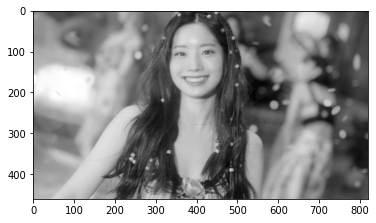

In [10]:
img1= cv.imread('/content/dahyun.png', 0)
plt.imshow(img1, cmap='gray')

In [11]:
img1[0][1]

96

### Hiding the message on the image

In [12]:
img2= img1.copy()

In [13]:
col_len= img2.shape[1]
img_latest_row= 0

for message in processed_a_bin_list:
    col_idx= 0
    while col_idx<len(message):
        pixel= img2[img_latest_row][col_idx]
        msg_bit= int(message[col_idx])
        
        if (msg_bit==1 and pixel%2==1) or (msg_bit==0 and pixel%2==0):
            pass
        elif msg_bit==1 and pixel%2==0:
            img2[img_latest_row][col_idx]+= 1
        elif msg_bit==0 and pixel%2==1:
            img2[img_latest_row][col_idx]-= 1

        col_idx+= 1

    img_latest_row+=1

    # break

In [14]:
img2[0][1]

97

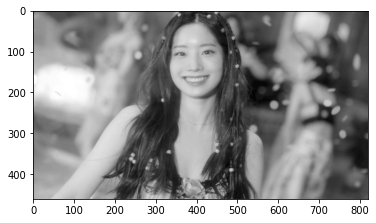

In [15]:
plt.imshow(img2, cmap='gray')

### Decode

In [18]:
get_message= []

for idx, row in enumerate(img2):
    temp_message= ''
    last_message= False
    col_idx= 0

    while True:
        binary_attached= 1 if row[col_idx]%2==1 else 0
        temp_message+= str(binary_attached)

        if temp_message[:len(BINARY_STOPPER)]==BINARY_STOPPER:
            last_message= True
            break

        if temp_message[len(BINARY_STOPPER)*(-1):]==BINARY_STOPPER: 
            break
            
        col_idx+= 1

    if last_message:
        break

    get_message.append(temp_message[:len(temp_message)-len(BINARY_STOPPER)])

In [19]:
get_message

['11101001111010111010111110011110101',
 '11010011110011111010011100101101001',
 '110100111010111101000111001111000011101110']

In [20]:
import textwrap

decoded_message= [textwrap.wrap(message, 7) for message in get_message]

In [21]:
for string in decoded_message:
    for i in string:
        print(chr(int(i, 2)), end='')

    print()

tzuyu
istri
ikhsan
